In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.

In [2]:
df = pd.read_csv('data/namu_wiki_data.csv')
df

,title,text
0,미하엘 발락,미하엘 발락의 역임 직책 ▼ 미하엘 발락의 수상 이력 ▼ ...
1,더 시드/스테이지 공략,상위 문서: 더 시드 1. 개요\n2. 층별 공략\n2.1. 공통 팁\n2.2. 1...
2,크레베이스,포켓몬 도감 나열 순서 711 펌킨인 712 꽁어름\n713 크레베이스 714 음뱃...
3,도쿠가와 히데타다,에도 막부 쇼군 [ 펼치기 · 접기 ] ...
4,까오니,인덕대학교 방송연예과 출신 유튜버 [ 펼치기 · 접기 ] ...
...,...,...
91,이시미(합격시켜주세용),상위 문서: 합격시켜주세용/등장인물 등장인물 목록 등장인물 목록 [ 펼치기 · 접...
92,데스티니 시리즈/등장인물,상위 문서: 데스티니 시리즈 데스티니 관련 문서 게임 배경 장소 | 등장인물 게임플...
93,길더로이 록하트,호그와트의 어둠의 마법 방어법 교수 [ 펼치기 · 접기 ] ...
94,감자튀김,이 이름으로 복면가왕에 출연한 참가자에 대한 내용은 케첩 두 개 주세요 감자튀김 문...


In [3]:
# 결측치 확인
df.isna().sum()

title    0
text     2
dtype: int64

In [4]:
# 결측치 제거
df.dropna(inplace=True)
df.isna().sum()

title    0
text     0
dtype: int64

### 한글 정제
- 불필요한 글자를 제거하는 과정
- 한글을 제외한 모든 글자를 제거한다

In [5]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣, a ~ z, A ~ Z)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣a-zA-Z]')
    # 정규식에 위배되는 것들일 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result

In [6]:
text_cleaning('동해물과_∞. 124, * (⅔ [백두] ab AK산이 ！마르고 닳도록')

'동해물과    백두 ab AK산이 마르고 닳도록'

In [7]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['text'] = df['text'].apply(lambda x : text_cleaning(x))

df

,title,text
0,미하엘 발락,미하엘 발락의 역임 직책 미하엘 발락의 수상 이력 ...
1,더 시드스테이지 공략,상위 문서 더 시드 개요 층별 공략 공통 팁 층 층 층 층 층 층 층 층 층 층 ...
2,크레베이스,포켓몬 도감 나열 순서 펌킨인 꽁어름 크레베이스 음뱃 지역 도감 나열 순서 ...
3,도쿠가와 히데타다,에도 막부 쇼군 펼치기 접기 ...
4,까오니,인덕대학교 방송연예과 출신 유튜버 펼치기 접기 ...
...,...,...
91,이시미합격시켜주세용,상위 문서 합격시켜주세용등장인물 등장인물 목록 등장인물 목록 펼치기 접기 바리...
92,데스티니 시리즈등장인물,상위 문서 데스티니 시리즈 데스티니 관련 문서 게임 배경 장소 등장인물 게임플레이...
93,길더로이 록하트,호그와트의 어둠의 마법 방어법 교수 펼치기 접기 ...
94,감자튀김,이 이름으로 복면가왕에 출연한 참가자에 대한 내용은 케첩 두 개 주세요 감자튀김 문...


In [8]:
# 말뭉치 생성을 위해 모든 문장을 하나의 문장으로 합친다.
title_corpus = ''.join(df['title'])
text_corpus = ''.join(df['text'])

In [9]:
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(df['text'].values)
nouns

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 118159 from 94 sents. mem=0.244 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=447952, mem=0.438 Gb
[Noun Extractor] batch prediction was completed for 38082 words
[Noun Extractor] checked compounds. discovered 11084 compounds
[Noun Extractor] postprocessing detaching_features : 24276 -> 19349
[Noun Extractor] postprocessing ignore_features : 19349 -> 19193
[Noun Extractor] postprocessing ignore_NJ : 19193 -> 19142
[Noun Extractor] 19142 nouns (11084 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.507 Gb                    
[Noun Extractor] 67.37 % eojeols are covered


{'부산항국제여객터미널': NounScore(frequency=2, score=1.0),
 '태양탄Sunshot': NounScore(frequency=2, score=1.0),
 'Production': NounScore(frequency=1, score=0.3333333333333333),
 '마산시티투어버스노선': NounScore(frequency=2, score=1.0),
 '코로나바이러스감염증': NounScore(frequency=8, score=0.6666666666666666),
 'Morfonica': NounScore(frequency=16, score=1.0),
 'Afterglow': NounScore(frequency=19, score=1.0),
 '디지털미디어시티역': NounScore(frequency=3, score=1.0),
 'Discovery': NounScore(frequency=1, score=0.3333333333333333),
 'Felwinter': NounScore(frequency=1, score=0.5),
 '테크노파크IT센터': NounScore(frequency=2, score=1.0),
 'Machinist': NounScore(frequency=2, score=1.0),
 'Amerzone': NounScore(frequency=2, score=1.0),
 '방어력마법저항력': NounScore(frequency=2, score=1.0),
 'Fighting': NounScore(frequency=6, score=1.0),
 '카이저슬라우테른': NounScore(frequency=9, score=1.0),
 'Mourinho': NounScore(frequency=5, score=1.0),
 'HB엔터테인먼트': NounScore(frequency=2, score=1.0),
 '전국동시지방선거': NounScore(frequency=3, score=1.0),
 '트란스니스트리아': NounScore(f

In [10]:
print(len(nouns))

19142


In [11]:
data_dict = {}

In [12]:
for key in nouns :
    # 빈도수가 20이상이고 확률이 1.0 이상인 것만 추출한다.
    if nouns[key].frequency >= 20 and nouns[key].score >= 1.0 :
        # 워드클라우드가 1글자가 있으면 문제가 생기때문에 2 글자 
        # 이상이 것만 담는다.
        if len(key) > 1 :
            data_dict[key] = nouns[key].frequency
            
data_dict

{'nosurge': 117,
 '우크라이나군': 39,
 '우크라이나인': 26,
 '양주산반달곰': 28,
 '천연가스버스': 24,
 '진워렌버핏': 230,
 '야샤히메들': 24,
 '인스타그램': 23,
 '벨라루스군': 20,
 '인민공화국': 21,
 '국가대표팀': 30,
 '프로토타입': 35,
 '업그레이드': 32,
 '데미그리프': 38,
 '테러리스트': 21,
 '분데스리가': 36,
 '디스플레이': 40,
 '우크라이나': 778,
 '러스트리아': 23,
 '라스푸티차': 30,
 '프리피야트': 21,
 '알트도르프': 23,
 '바르셀로나': 57,
 '인천광역시': 43,
 '유나이티드': 22,
 '브레토니아': 26,
 '라이클란트': 32,
 '라익스가드': 32,
 '슬로바키아': 22,
 '아웃라이더': 21,
 'Radio': 82,
 '크레베이스': 26,
 '보여주었다': 33,
 '마린부르크': 20,
 '체르니히우': 22,
 '동계올림픽': 23,
 '수호자들': 55,
 '플러그인': 35,
 '러시아군': 118,
 '노래마법': 22,
 '감자튀김': 39,
 '마리우폴': 24,
 '프로그램': 58,
 '반암결록': 28,
 '여명신검': 30,
 '라스푸틴': 22,
 '체르노빌': 134,
 '아이언맨': 27,
 '대한민국': 86,
 '캐릭터들': 21,
 '오리지널': 32,
 '소요시간': 34,
 '그린스킨': 24,
 '리자드맨': 28,
 '레버쿠젠': 43,
 '등장인물': 54,
 '동인천역': 24,
 '배차간격': 41,
 '스마트폰': 20,
 '비스트맨': 23,
 '스케이븐': 31,
 '카이아틀': 23,
 '어마어마': 28,
 '프리스트': 27,
 '엘릭스니': 70,
 '야샤히메': 33,
 '간선버스': 40,
 '플레이어': 53,
 '어빌리티': 39,
 '랜드마크': 29,
 '굴곡노선': 32,
 '일러스트': 89,
 '콘크리트': 21,
 '프리

### 워드클라우드

In [13]:
# 워드 클라우드를 위한 객체로 생성한다.
counter1 = Counter(data_dict)
counter1

Counter({'nosurge': 117,
         '우크라이나군': 39,
         '우크라이나인': 26,
         '양주산반달곰': 28,
         '천연가스버스': 24,
         '진워렌버핏': 230,
         '야샤히메들': 24,
         '인스타그램': 23,
         '벨라루스군': 20,
         '인민공화국': 21,
         '국가대표팀': 30,
         '프로토타입': 35,
         '업그레이드': 32,
         '데미그리프': 38,
         '테러리스트': 21,
         '분데스리가': 36,
         '디스플레이': 40,
         '우크라이나': 778,
         '러스트리아': 23,
         '라스푸티차': 30,
         '프리피야트': 21,
         '알트도르프': 23,
         '바르셀로나': 57,
         '인천광역시': 43,
         '유나이티드': 22,
         '브레토니아': 26,
         '라이클란트': 32,
         '라익스가드': 32,
         '슬로바키아': 22,
         '아웃라이더': 21,
         'Radio': 82,
         '크레베이스': 26,
         '보여주었다': 33,
         '마린부르크': 20,
         '체르니히우': 22,
         '동계올림픽': 23,
         '수호자들': 55,
         '플러그인': 35,
         '러시아군': 118,
         '노래마법': 22,
         '감자튀김': 39,
         '마리우폴': 24,
         '프로그램': 58,
         '반암결록': 28,
         '여명신검': 30,
         

In [14]:
# 가장 빈도수가 높은 단어 100개를 추출한다.
cloud_data = counter1.most_common(100)
cloud_data

[('때문', 1644),
 ('추가', 805),
 ('노선', 800),
 ('우크라이나', 778),
 ('전쟁', 736),
 ('가능성', 640),
 ('상황', 631),
 ('모습', 623),
 ('사용', 611),
 ('공격', 540),
 ('생각', 515),
 ('당시', 483),
 ('제국', 478),
 ('함께', 468),
 ('이상', 468),
 ('다시', 454),
 ('시간', 449),
 ('가장', 428),
 ('결국', 420),
 ('사람', 410),
 ('물론', 409),
 ('등장', 400),
 ('키린마루', 399),
 ('보면', 398),
 ('수도', 396),
 ('바로', 384),
 ('이름', 383),
 ('유신', 370),
 ('시작', 368),
 ('채널', 367),
 ('스킬', 366),
 ('본인', 364),
 ('사실', 363),
 ('미국', 363),
 ('아돌프', 356),
 ('실제', 344),
 ('자체', 333),
 ('역시', 325),
 ('경유', 318),
 ('방송', 313),
 ('내용', 299),
 ('감독', 299),
 ('가능', 295),
 ('이용', 295),
 ('무리뉴', 286),
 ('진행', 286),
 ('일본', 276),
 ('해당', 276),
 ('이전', 276),
 ('수준', 266),
 ('과거', 266),
 ('필요', 258),
 ('공격력', 254),
 ('캠페인', 252),
 ('셋쇼마루', 251),
 ('계속', 248),
 ('제외', 247),
 ('기준', 242),
 ('시절', 241),
 ('대부분', 237),
 ('참고', 235),
 ('진워렌버핏', 230),
 ('사실상', 221),
 ('마법', 215),
 ('비슷', 214),
 ('업데이트', 209),
 ('입장', 209),
 ('점령', 208),
 ('능력치', 205),
 ('마지막', 202)

### 폰트설정
- 워드클라우드는 한글 폰트가 없기 때문에 오류가 발생한다.
- 한글폰트를 등록해야 한다.
- 기본 아나콘다 환경을 사용할 경우
- C:\Users\계정\anaconda3\Lib\site-packages\pytagcloud\fonts
- 가상환경을 사용할 경우
- C:\Users\계정\anaconda3\envs\가상환경이름\Lib\site-packages\pytagcloud\fonts
- 사용하고자 하는 폰트를 해당 폴더에 넣어준다.
- 같은 폴더에 있는 font.json 파일에 폰트 정보를 추가해준다.
   {
        "name": "NanumGothic",
        "ttf": "NanumGothic.ttf",
        "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
    }

In [15]:
cloud_data = pytagcloud.make_tags(cloud_data)

pytagcloud.create_tag_image(cloud_data, 'text_word.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

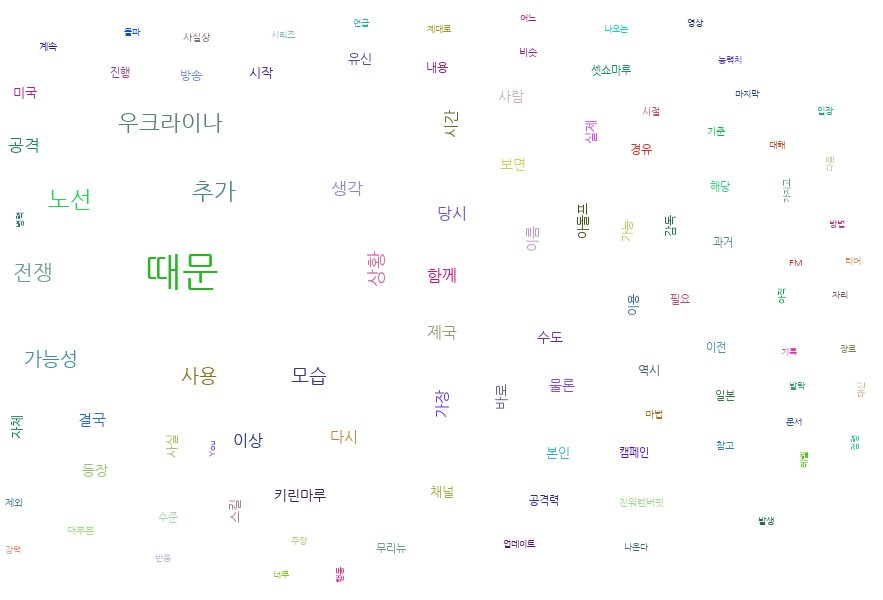

In [16]:
Image(filename='text_word.jpg')